# Comparison between the ages for the genders (after controlling for type)

Questions

- What are the differences between the ages for the different genders?
- Do we observe the same changes as globally?

Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [45]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between ages and genders (after controlling type)
F_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1/2), alpha=0.05, test="Wald")
M_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1/2), alpha=0.05, test="Wald")
F_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1/2,0), alpha=0.05, test="Wald")
M_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1/2,0), alpha=0.05, test="Wald")
F_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1/2,-1/2), alpha=0.05, test="Wald")
M_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1/2,-1/2), alpha=0.05, test="Wald")

In [7]:
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
annot = as.data.frame(colData(dge)[, c("age", "type")])
to_comp = c("52w VS 8w (F)","52w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)", "104w VS 8w (F)", "104w VS 8w (M)")

# Stats

In [8]:
# Stats
age_gender_stats = matrix(0, nrow=6, ncol=3)
rownames(age_gender_stats) = to_comp
colnames(age_gender_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
age_gender_stats["52w VS 8w (F)",] = get_stats_padj(F_52w_8w)
age_gender_stats["52w VS 8w (M)",] = get_stats_padj(M_52w_8w)
age_gender_stats["104w VS 52w (F)",] = get_stats_padj(F_104w_52w)
age_gender_stats["104w VS 52w (M)",] = get_stats_padj(M_104w_52w)
age_gender_stats["104w VS 8w (F)",] = get_stats_padj(F_104w_8w)
age_gender_stats["104w VS 8w (M)",] = get_stats_padj(M_104w_8w)
age_gender_stats

Wald padj < 0.05 LFC > 0 (Wald padj < 0.05)
52w VS 8w (F)   2278             1265                      
52w VS 8w (M)    427              261                      
104w VS 52w (F)  290              169                      
104w VS 52w (M) 3872             1974                      
104w VS 8w (F)  1841             1074                      
104w VS 8w (M)  3706             1925                      
                LFC < 0 (Wald padj < 0.05)
52w VS 8w (F)   1013                      
52w VS 8w (M)    166                      
104w VS 52w (F)  121                      
104w VS 52w (M) 1898                      
104w VS 8w (F)   767                      
104w VS 8w (M)  1781

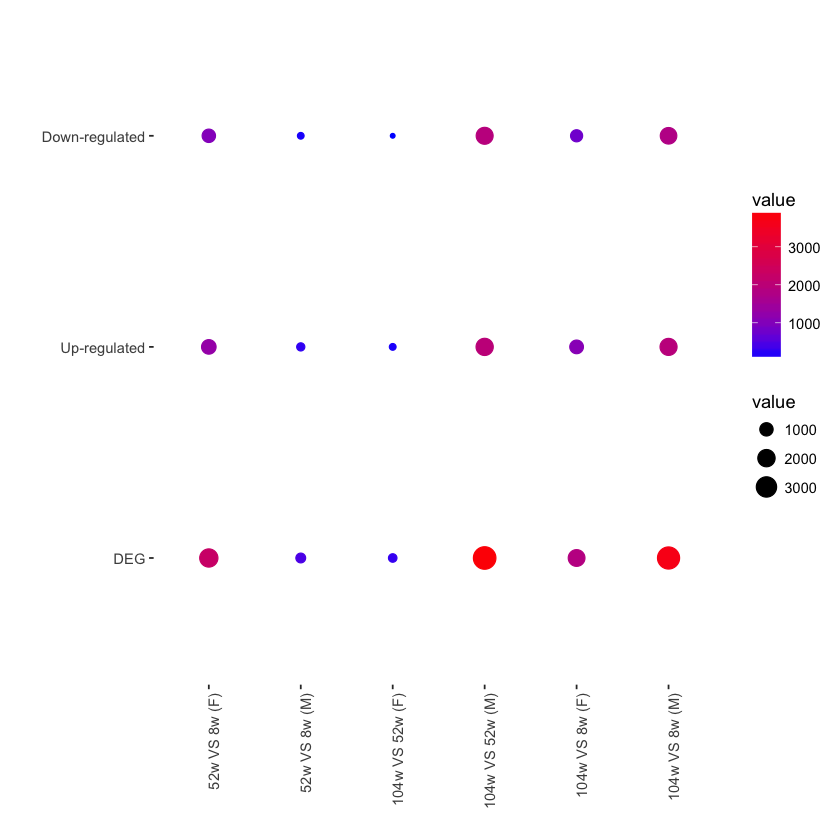

In [9]:
plot_stat_mat(age_gender_stats)

# Differentially expressed genes

In [10]:
age_gender_data = list(F_52w_8w, M_52w_8w, F_104w_52w, M_104w_52w, F_104w_8w, M_104w_8w)
names(age_gender_data) = to_comp
age_gender_deg = extract_diff_expr_genes(age_gender_data, "age-effect/age_gender/")

  52w VS 8w (F)   52w VS 8w (M) 104w VS 52w (F) 104w VS 52w (M)  104w VS 8w (F) 
      0.4021071       0.6557377       0.6620690       0.4093492       0.5192830 
 104w VS 8w (M) 
      0.4932542 


Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Counts

52w != 8w or 104w != 8w or 104w != 52w for F with abs(FC) > 2

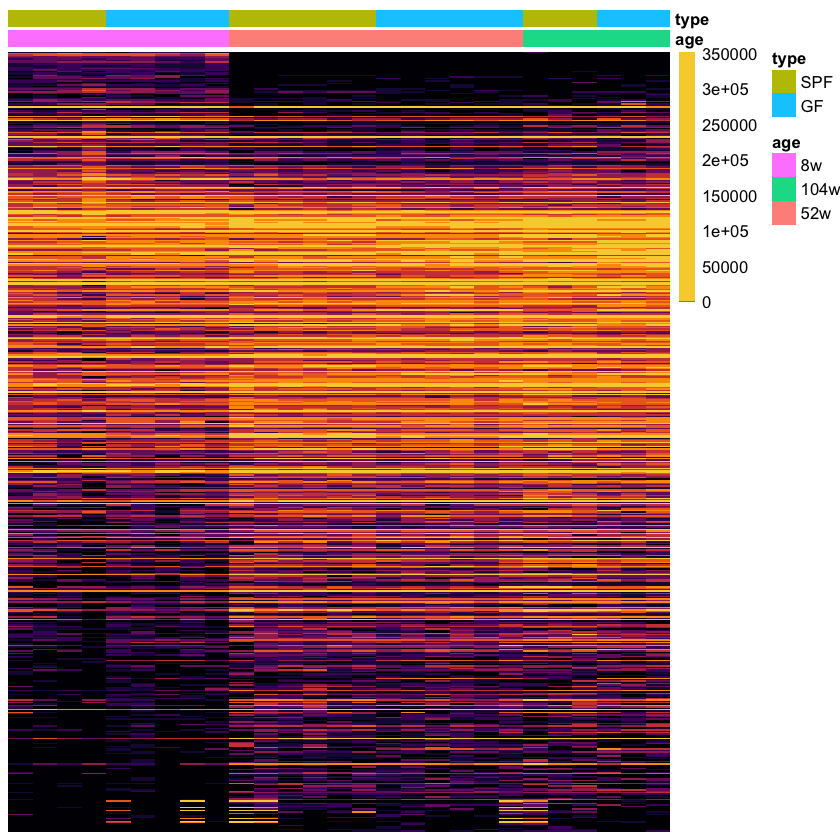

In [11]:
# 52w != 8w or 104w != 8w or 104w != 52w for F with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1 | abs(age_gender_deg$fc_deg[,3])>1 | abs(age_gender_deg$fc_deg[,5])>1),1])))
plot_count_heatmap(genes,F_samples, annot)

52w != 8w or 104w != 8w or 104w != 52w for M with abs(FC) > 2

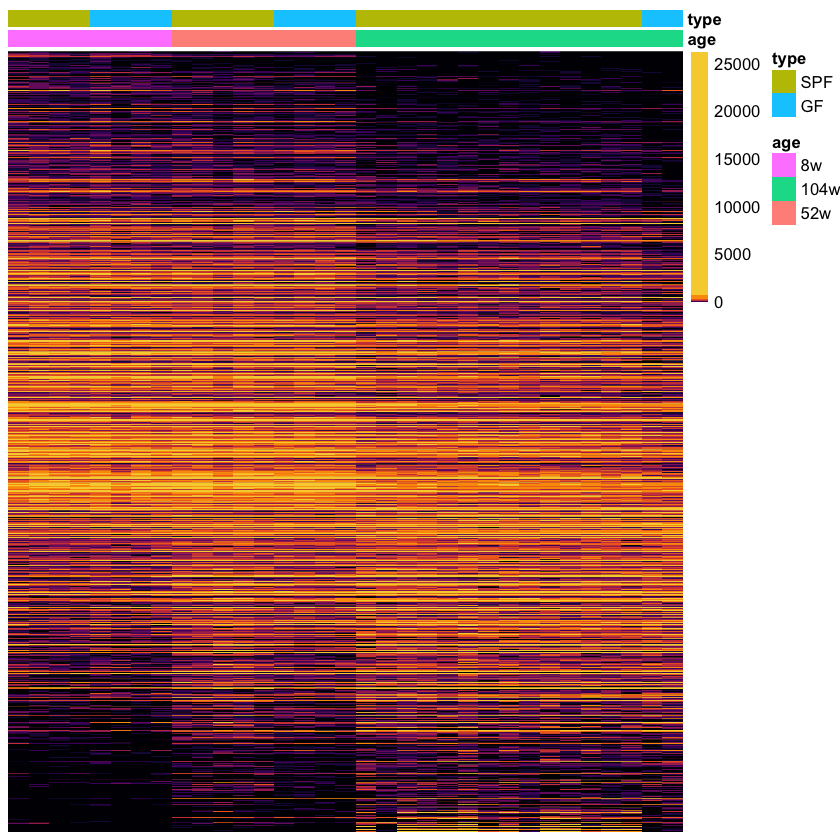

In [12]:
# 52w != 8w or 104w != 8w or 104w != 52w for M with abs(FC) > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,2])>1 | abs(age_gender_deg$fc_deg[,4])>1 | abs(age_gender_deg$fc_deg[,6])>1),6])))
plot_count_heatmap(genes,M_samples, annot)

Genes with 52w != 8w or 104w != 8w or 104w != 52w for M or F and at least one FC > 2

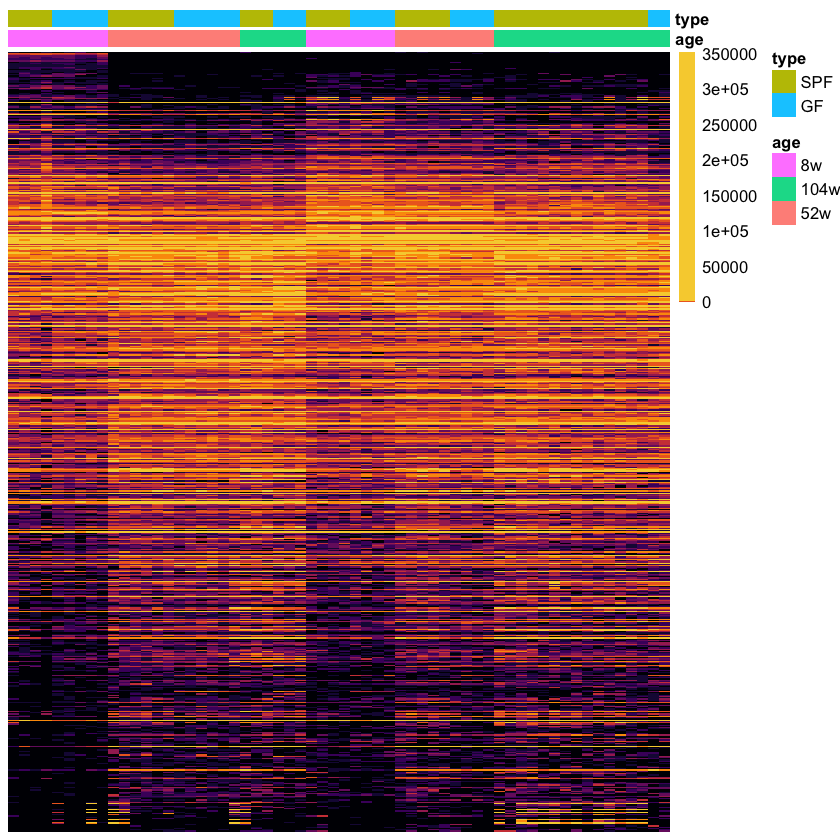

In [13]:
# Genes with 52w != 8w or 104w != 8w or 104w != 52w for M or F and at least one FC > 2
genes = names((sort(age_gender_deg$fc_deg[which(abs(age_gender_deg$fc_deg[,1])>1|abs(age_gender_deg$fc_deg[,2])>1|abs(age_gender_deg$fc_deg[,3])>1|abs(age_gender_deg$fc_deg[,4])>1|abs(age_gender_deg$fc_deg[,5])>1|abs(age_gender_deg$fc_deg[,6])>1),1])))
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
plot_count_heatmap(genes,samples, annot)

# Comparison of the numbers per types

Differentially expressed genes

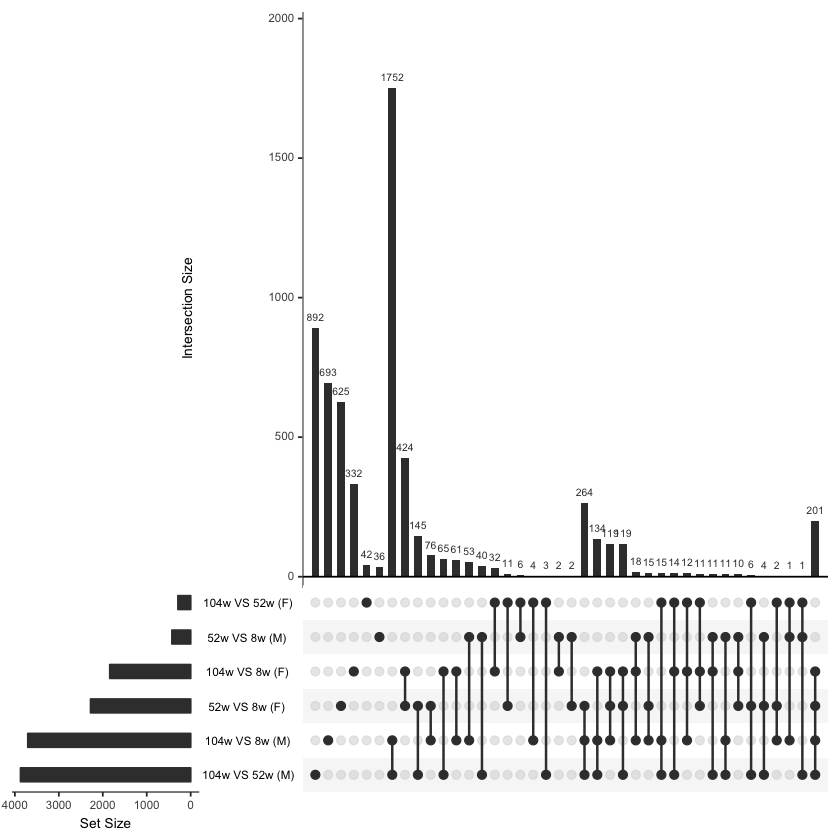

In [14]:
# Differentially expressed genes
upset(as.data.frame(age_gender_deg$deg),nsets = 6)

Some explanation (specially for the gender difference in microglia aging)
![](../results/dge/age-effect/age_gender/gender_difference_aging_hist_explanation.png)

Differentially more expressed genes

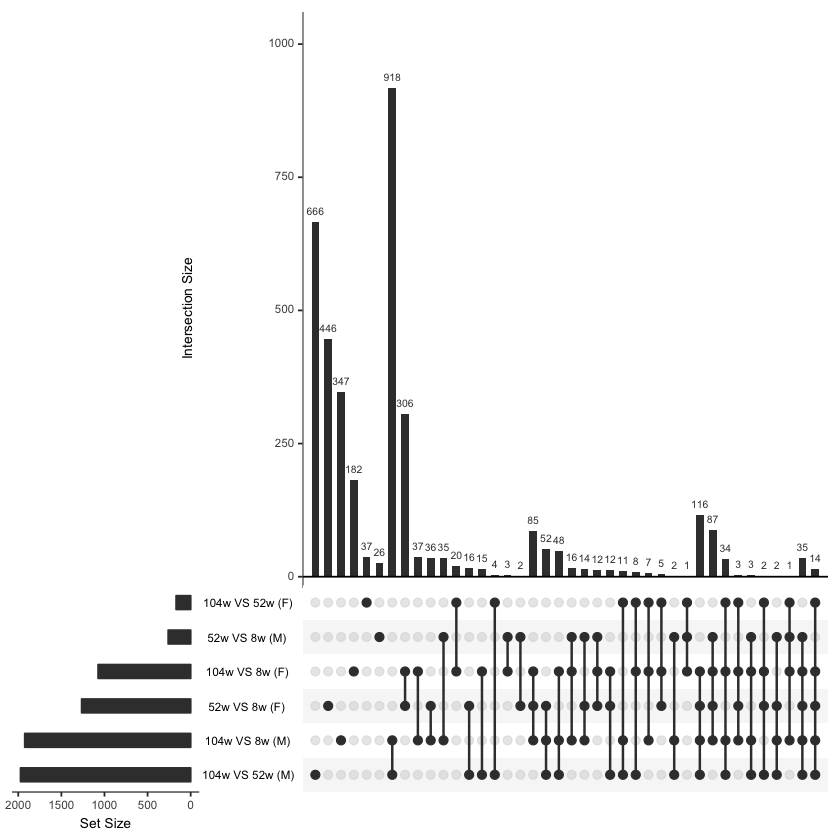

In [15]:
# Differentially more expressed genes
upset(as.data.frame(age_gender_deg$pos),nsets = 6)

Differentially less expressed genes

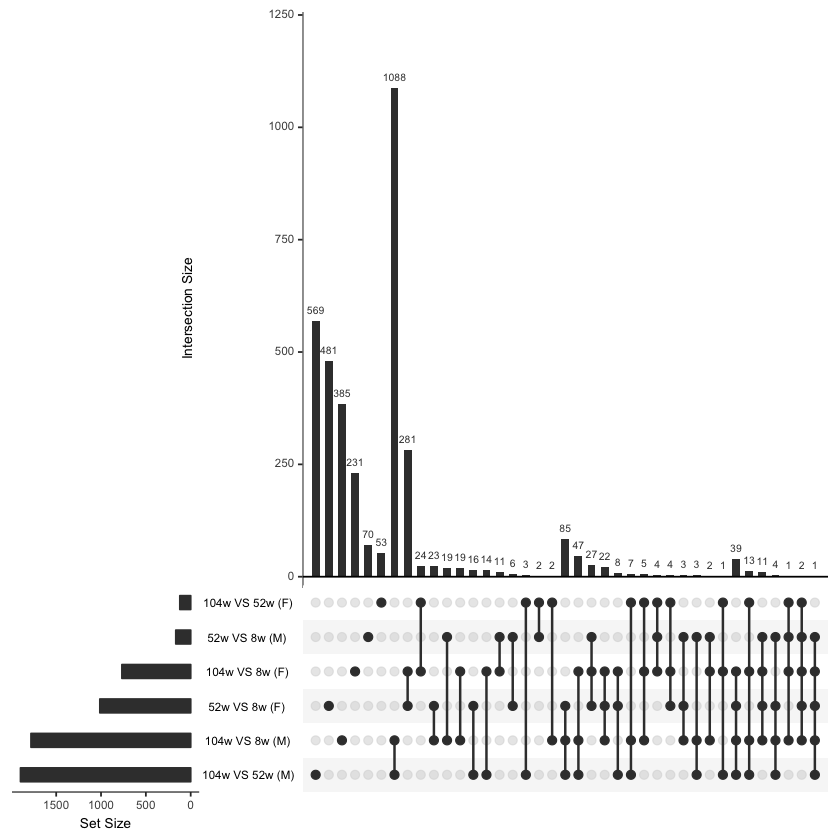

In [16]:
# Differentially less expressed genes
upset(as.data.frame(age_gender_deg$neg),nsets = 6)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated


Comp | Male | Female
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

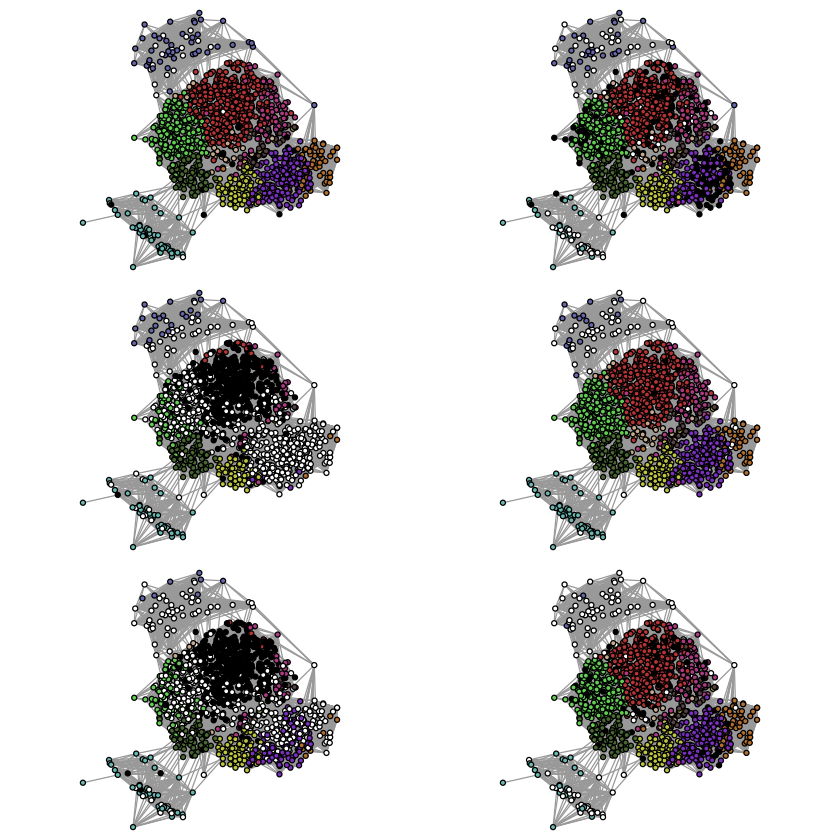

In [17]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
col_52w_vs_8w_F = get_deg_colors(age_gender_deg, "52w VS 8w (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_F, pal2, layout, add_legend = FALSE)
col_52w_vs_8w_M = get_deg_colors(age_gender_deg, "52w VS 8w (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_52w_vs_8w_M, pal2, layout, add_legend = FALSE)
col_104w_vs_52w_F = get_deg_colors(age_gender_deg, "104w VS 52w (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_F, pal2, layout, add_legend = FALSE)
col_104w_vs_52w_M = get_deg_colors(age_gender_deg, "104w VS 52w (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_52w_M, pal2, layout, add_legend = FALSE)
col_104w_vs_8w_F = get_deg_colors(age_gender_deg, "104w VS 8w (M)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_8w_F, pal2, layout, add_legend = FALSE)
col_104w_vs_8w_M = get_deg_colors(age_gender_deg, "104w VS 8w (F)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_104w_vs_8w_M, pal2, layout, add_legend = FALSE)

# GO analysis

In [18]:
full_go_desc = age_gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_gender_deg$GO_wall[[1]][,"category"]
comp = colnames(age_gender_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


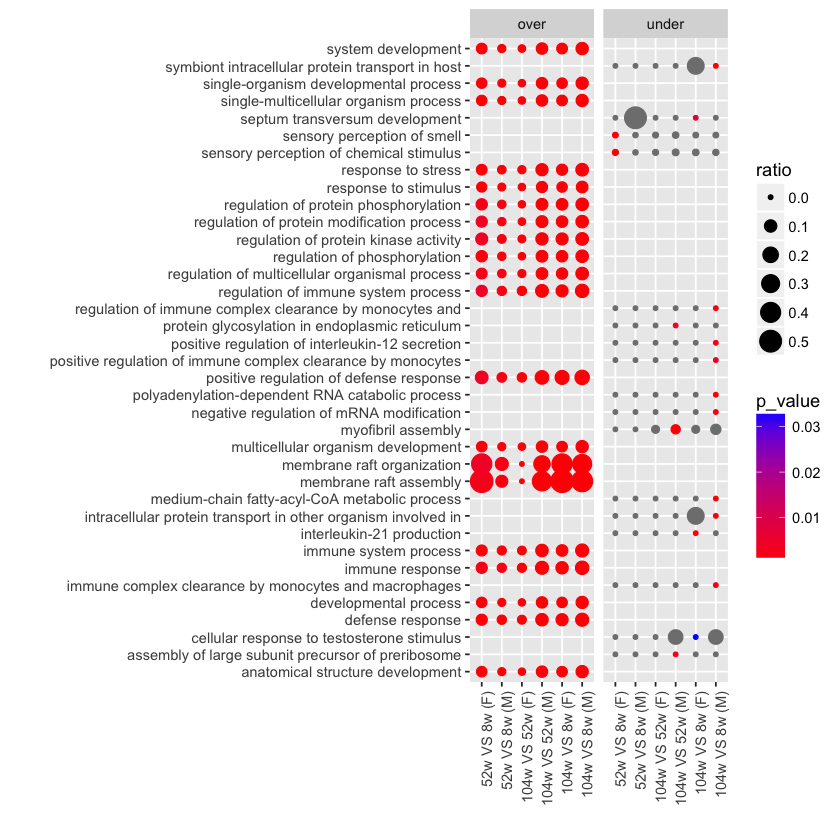

In [46]:
plot_top_go(age_gender_deg$over_represented_GO,
            age_gender_deg$under_represented_GO,
            age_gender_deg$GO_wall,
            "BP",
            20)

Network based on description similarity

In [20]:
BP_network = create_GO_network(age_gender_deg, "BP", BP_GO)

Comp | Male | Female
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

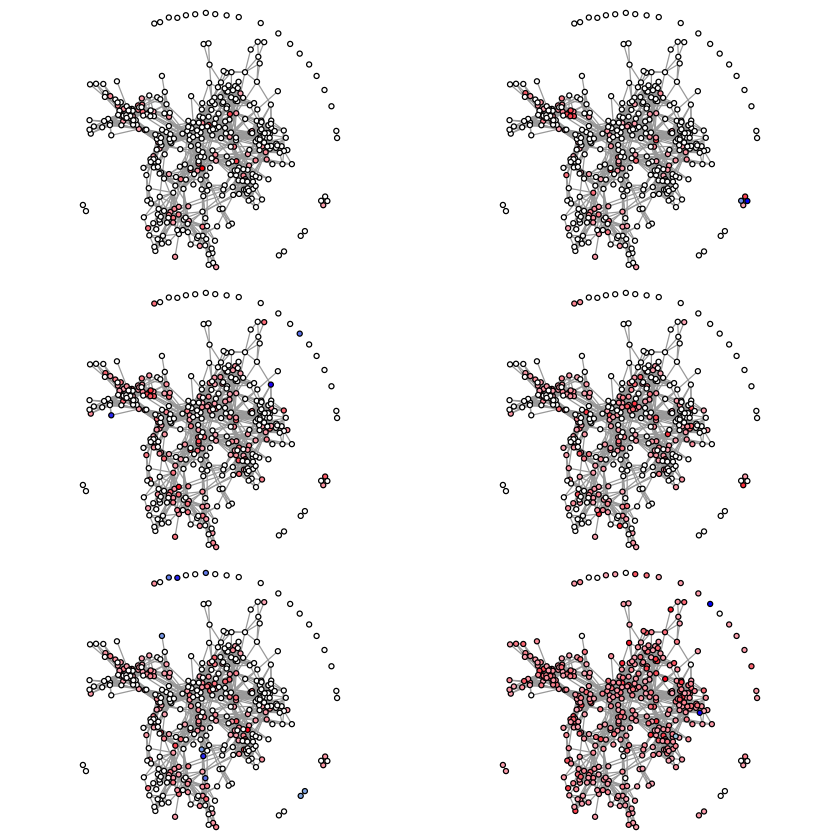

In [21]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)

52w VS 8w (F)

In [22]:
# 52w VS 8w (F)
plot_GO_networks(BP_network, "52w VS 8w (F)", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

52w VS 8w (M)

In [23]:
# 52w VS 8w (M)
plot_GO_networks(BP_network, "52w VS 8w (M)", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

104w VS 52w (F)

In [24]:
# 104w VS 52w (F)
plot_GO_networks(BP_network, "104w VS 52w (F)", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

104w VS 52w (M)

In [25]:
# 104w VS 52w (M)
plot_GO_networks(BP_network, "104w VS 52w (M)", full_go_desc, plot_non_interactive = FALSE)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


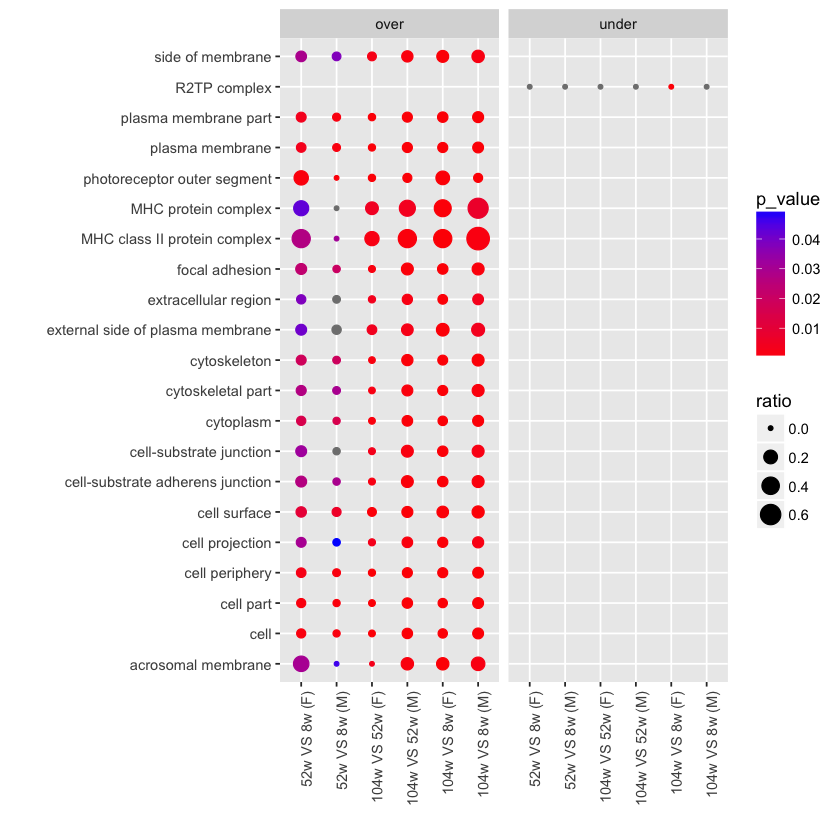

In [47]:
plot_top_go(age_gender_deg$over_represented_GO,
            age_gender_deg$under_represented_GO,
            age_gender_deg$GO_wall,
            "CC",
            20)

In [27]:
CC_network = create_GO_network(age_gender_deg, "CC", CC_GO)

Comp | Female | Male
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

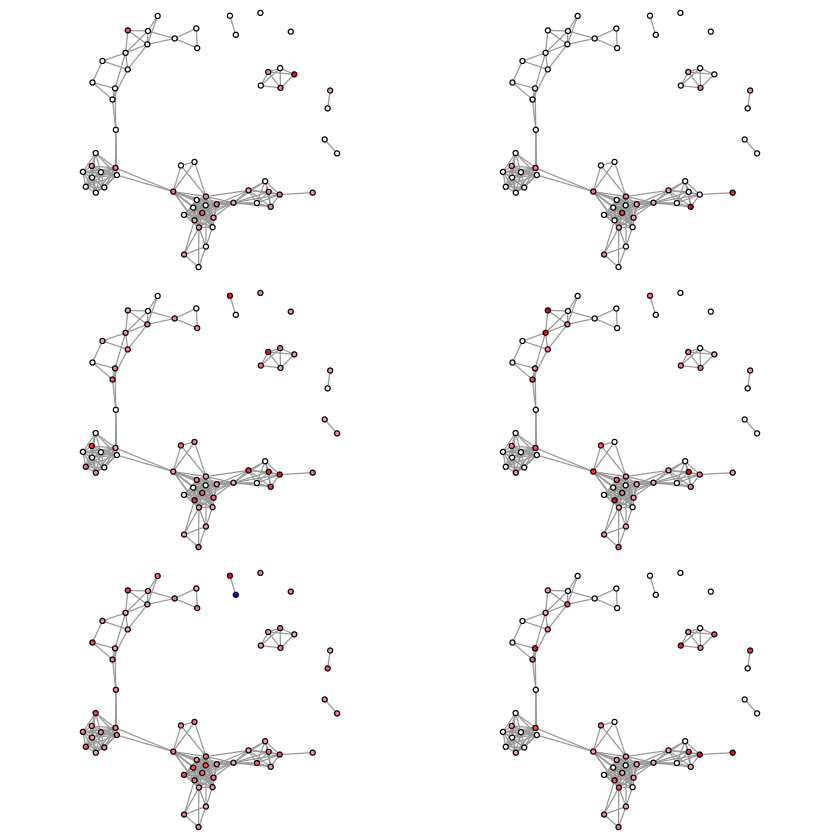

In [28]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(CC_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


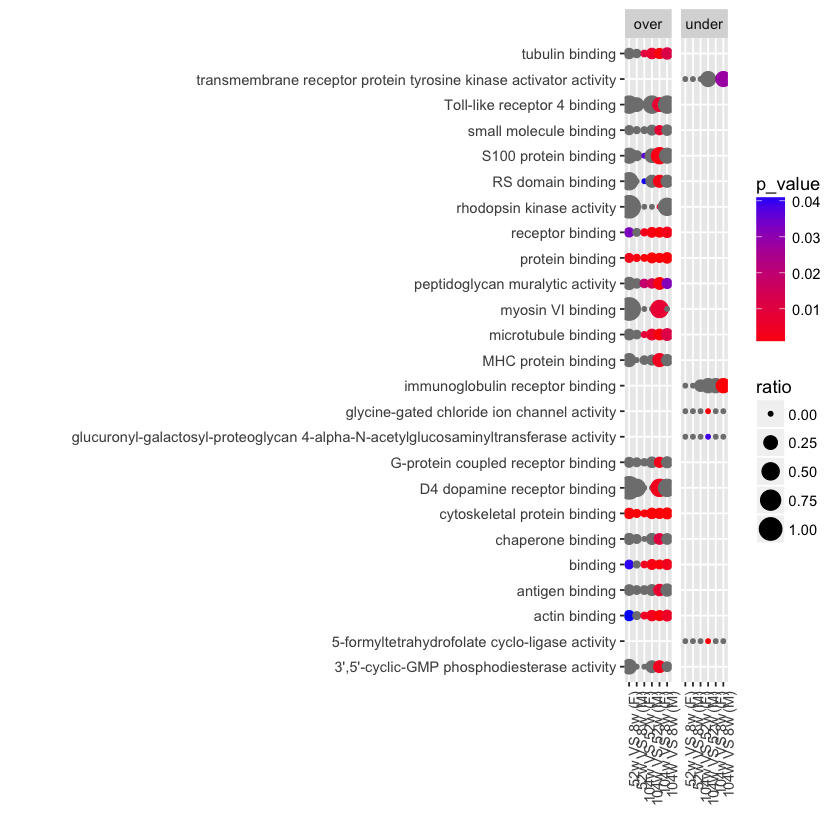

In [48]:
plot_top_go(age_gender_deg$over_represented_GO,
            age_gender_deg$under_represented_GO,
            age_gender_deg$GO_wall,
            "MF",
            20)

In [30]:
MF_network = create_GO_network(age_gender_deg, "MF", MF_GO)

Comp | Female | Male
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

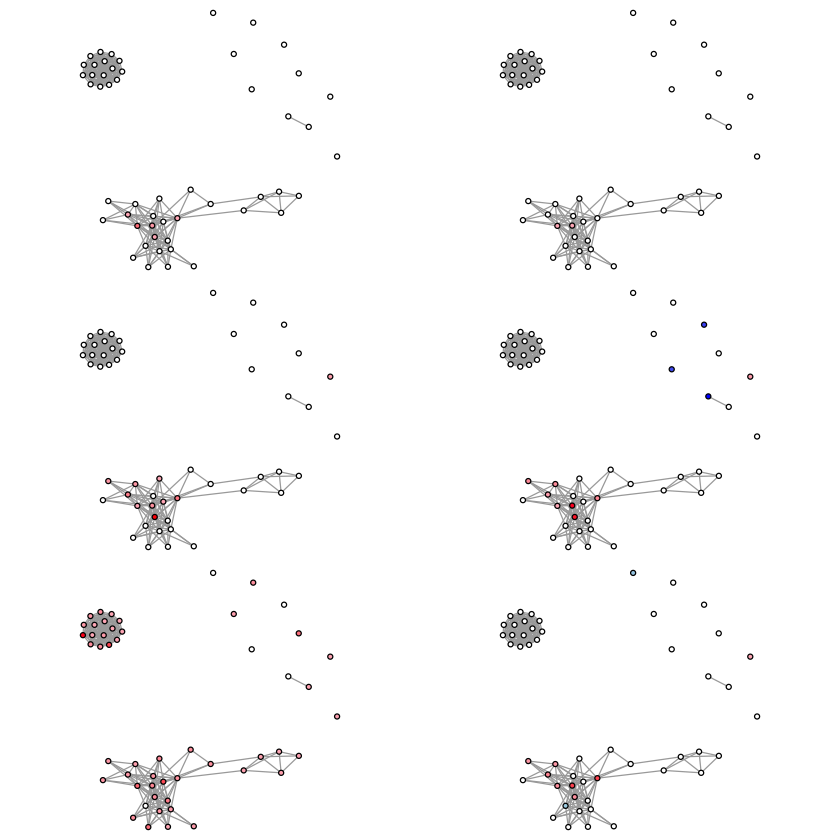

In [31]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(MF_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)

# KEGG pathways

In [32]:
plot_kegg_pathways(age_gender_deg$over_represented_KEGG[,"category"],
                   age_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_gender/kegg/over_repr_kegg/")

[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."


In [33]:
plot_kegg_pathways(age_gender_deg$under_represented_KEGG[,"category"],
                   age_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_gender/kegg/under_repr_kegg/")

[1] "Note: 10 of 6572 unique input IDs unmapped."
[1] "Note: 10 of 6572 unique input IDs unmapped."


Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$c

# Gender differences in aging

Question: Is there differences in aging between gender? Is there really a delay for some genes in male?

| 52w vs 8w for F | 52w vs 8w for M | 104w vs 52w for F | 104w vs 52w for M | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != | == | == | != | 729
Set 2 | == | != | != | == | 9

Gene number
Set 1 363        
Set 2  16

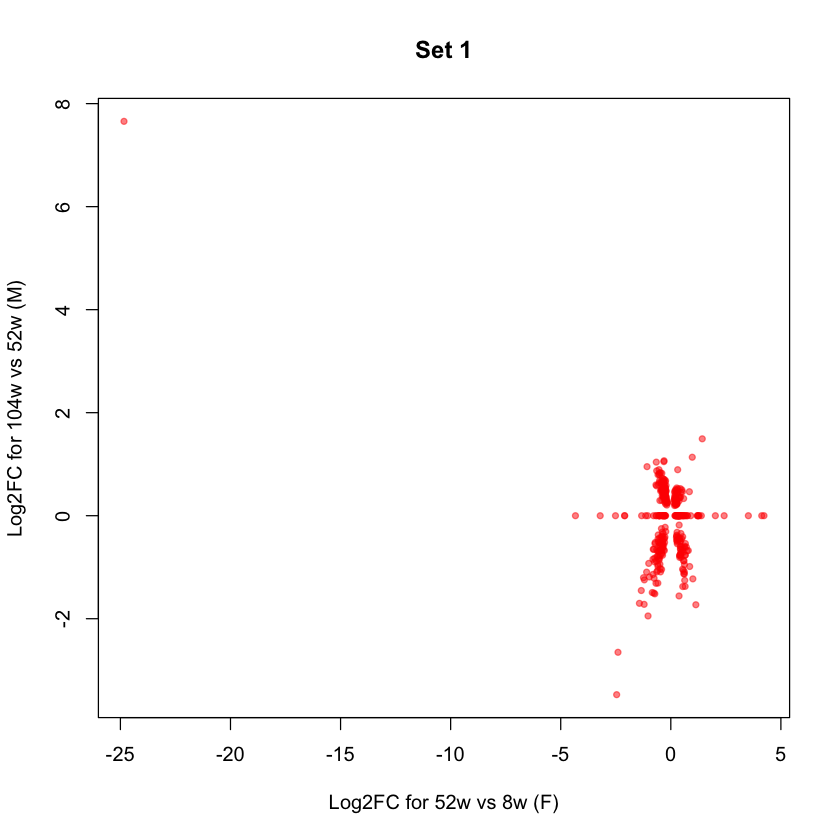

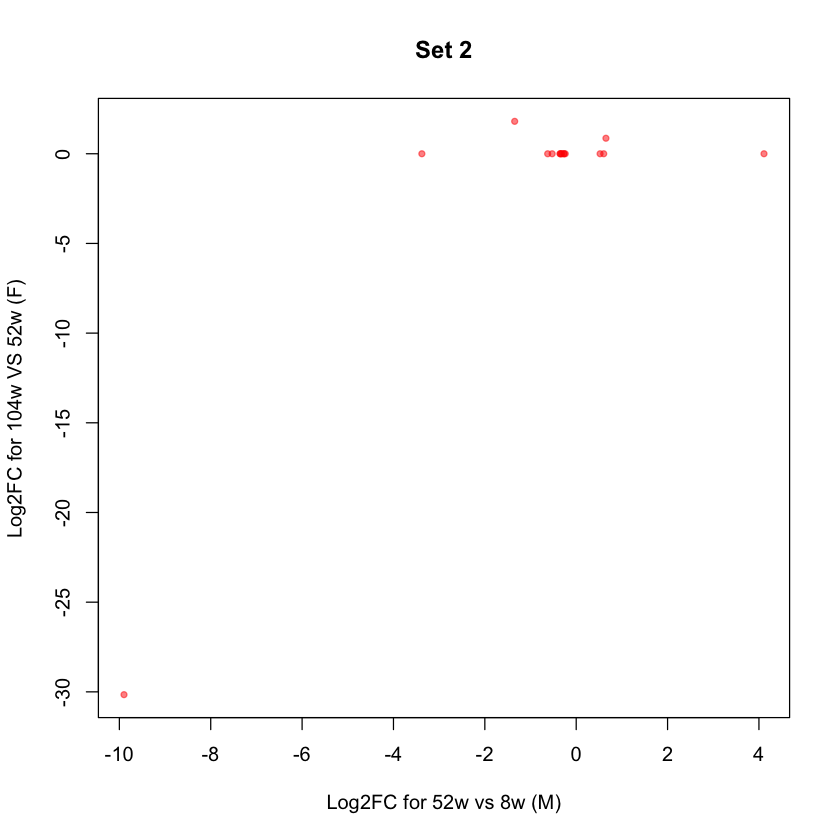

In [34]:
# set extractions
set1 = rownames(age_gender_deg$fc_deg[!is.na(age_gender_deg$fc_deg[,1]) & is.na(age_gender_deg$fc_deg[,2]) & is.na(age_gender_deg$fc_deg[,5]) & !is.na(age_gender_deg$fc_deg[,6]),])
set2 = rownames(age_gender_deg$fc_deg[is.na(age_gender_deg$fc_deg[,1]) & !is.na(age_gender_deg$fc_deg[,2]) & !is.na(age_gender_deg$fc_deg[,5]) & is.na(age_gender_deg$fc_deg[,6]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_gender_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_gender_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0
# plots of the differences
plot(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"], main="Set 1", xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
plot(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"], main="Set 2", xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w VS 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))

## Genes with differential expression delayed in male

Genes (set 1):
- Differentially expressed between 52w and 8w in F
- Not differentially expressed between 104w and 52w in F
- Not differentially expressed between 52w and 8w in M
- Differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

![](../doc/images/male_delayed_gene_analysis_explanation.png)

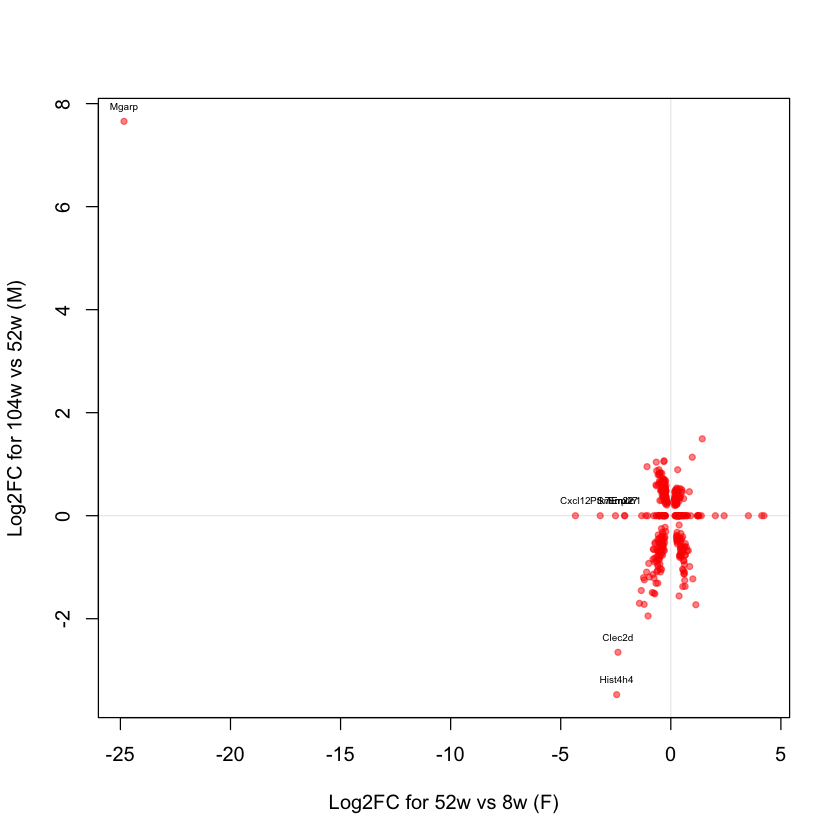

In [35]:
# How the genes changed in the first phase (between 8w and 52w) in Female change in the second phase (between 52w and 104w) for the Male
aging_gender_diff = cbind(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"])
colnames(aging_gender_diff) = c("52w VS 8w (F)","104w VS 52w (M)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(extr[,1],extr[,2], labels = rownames(extr), pos=3, cex=0.5)

### 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0

In [36]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_pos_M_pos_set_1)
#investigate_enrichement(rownames(F_pos_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 50

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 8.7003, df = 48, p-value = 1.966e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6441926 0.8709710
sample estimates:
      cor 
0.7822715 



### 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0

In [37]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_pos_M_neg_set_1)
#investigate_enrichement(rownames(F_pos_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 57

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -5.7366, df = 55, p-value = 4.269e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7524478 -0.4178952
sample estimates:
       cor 
-0.6118397 



### 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0

In [38]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_neg_M_pos_set_1)
#investigate_enrichement(rownames(F_neg_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 93

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -41.402, df = 91, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9830365 -0.9616553
sample estimates:
      cor 
-0.974468 



### 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0

In [39]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_neg_M_neg_set_1)
#investigate_enrichement(rownames(F_neg_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 85

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 16.287, df = 83, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8103367 0.9155649
sample estimates:
      cor 
0.8727371 



### Summary

![](../results/dge/age-effect/age_gender/male_delayed_genes.png)

Comp | 52w VS 8w (F) < 0 | 52w VS 8w (F) > 0
--- | --- | ---
104w VS 52w (M) > 0 | |
104w VS 52w (M) < 0 | |

[1] 53

[1] 10

[1] 53

[1] 14

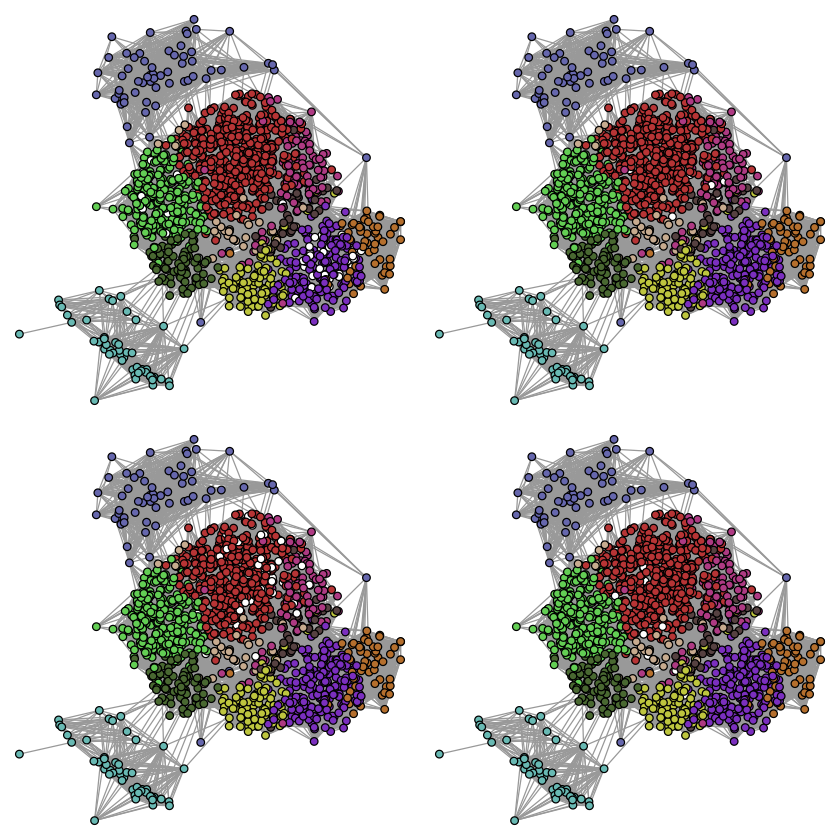

In [40]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1_col = connected_gene_colors
sum(names(F_neg_M_pos_set_1_col) %in% rownames(F_neg_M_pos_set_1))
F_neg_M_pos_set_1_col[which(names(F_neg_M_pos_set_1_col) %in% rownames(F_neg_M_pos_set_1))] = module_nb + 1
plot_net_with_layout(net, F_neg_M_pos_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1_col = connected_gene_colors
sum(names(F_pos_M_pos_set_1_col) %in% rownames(F_pos_M_pos_set_1))
F_pos_M_pos_set_1_col[which(names(F_pos_M_pos_set_1_col) %in% rownames(F_pos_M_pos_set_1))] = module_nb + 1
plot_net_with_layout(net, F_pos_M_pos_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1_col = connected_gene_colors
sum(names(F_neg_M_neg_set_1_col) %in% rownames(F_neg_M_neg_set_1))
F_neg_M_neg_set_1_col[which(names(F_neg_M_neg_set_1_col) %in% rownames(F_neg_M_neg_set_1))] = module_nb + 1
plot_net_with_layout(net, F_neg_M_neg_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1_col = connected_gene_colors
sum(names(F_pos_M_neg_set_1_col) %in% rownames(F_pos_M_neg_set_1))
F_pos_M_neg_set_1_col[which(names(F_pos_M_neg_set_1_col) %in% rownames(F_pos_M_neg_set_1))] = module_nb + 1
plot_net_with_layout(net, F_pos_M_neg_set_1_col, pal2, layout, add_legend = F)

## Genes with differential expression delayed in female

Genes (set 2):
- Not differentially expressed between 52w and 8w in F
- Differentially expressed between 104w and 52w in F
- Differentially expressed between 52w and 8w in M
- Not differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

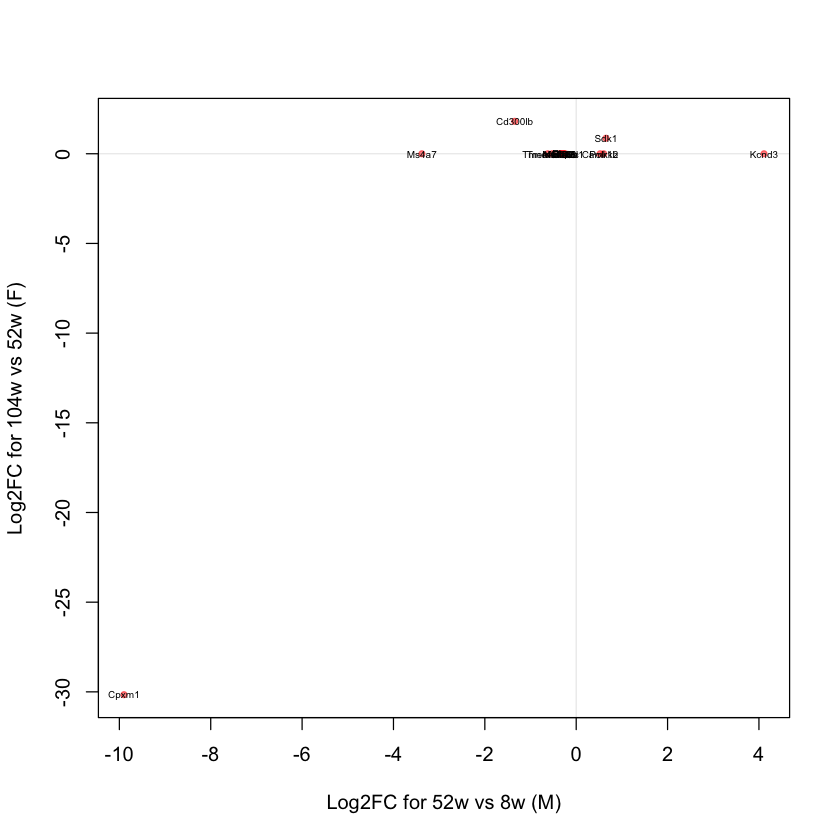

In [41]:
# How the genes changed in the first phase (between 8w and 52w) in Male change in the second phase (between 52w and 104w) for the Female
aging_gender_diff = cbind(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"])
colnames(aging_gender_diff) = c("52w VS 8w (M)","104w VS 52w (F)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w vs 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
#extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(aging_gender_diff[,1],aging_gender_diff[,2], labels = rownames(aging_gender_diff), cex=0.5)

In [42]:
set_2_col = connected_gene_colors
sum(names(set_2_col) %in% rownames(aging_gender_diff))
#set_2_col[which(names(set_2_col) %in% rownames(aging_gender_diff))] = module_nb + 1
#plot_net_with_layout(net, set_2_col, pal2, layout)

[1] 2